# Capstone Project Name: Retail
# Done by: Rejani Ninan

## Problem Statement:
#### It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
#### Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
#### Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).
----------------------------------------------------------------------

##### This is a transactional data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
ds_train=pd.read_excel("R:\\Data Science\\SimpliLearn\\COURSE PROJECTS\\CapStone project\\Project 3 datasets\\train.xlsx")

In [3]:
df_train=pd.DataFrame(ds_train)

In [4]:
df_train.shape

(379336, 8)

# Data Cleaning
-----------------------------------------------

### 1.To check for columns having missing values

In [5]:
df_train.isnull().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

### To Determine the % of missing values in each column

In [6]:
# To determine the % of missing values of each column
percent_missing = df_train.isnull().sum() * 100 / len(df_train)
missing_value_df = pd.DataFrame({'column_name': df_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
InvoiceNo,InvoiceNo,0.000000
StockCode,StockCode,0.000000
Description,Description,0.253865
Quantity,Quantity,0.000000
InvoiceDate,InvoiceDate,0.000000
UnitPrice,UnitPrice,0.000000
CustomerID,CustomerID,24.848683
Country,Country,0.000000


In [7]:
df_train.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

### Remove rows where 'CustomerID' is Null

In [8]:
# Remove rows where 'CustomerID' is NaN
# Dropping the rowns having NaN/NaT values
# under certain label
df_train_new = df_train.dropna(subset=['CustomerID'])
 
# Resetting the indices using df.reset_index()
df_train_new = df_train_new.reset_index(drop=True)

In [9]:
df_train_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
1,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
2,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
3,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom
4,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom
...,...,...,...,...,...,...,...,...
285071,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom
285072,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom
285073,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom
285074,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom


In [10]:
# Checking for any more missing values
df_train_new['Description'].isnull().sum()

0

### Determine Duplicate records

In [11]:
duplicate = df_train_new[df_train_new.duplicated()]
duplicate

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2166,575117,21098,CHRISTMAS TOILET ROLL,1,2011-11-08 14:22:00,1.25,12748.0,United Kingdom
4335,542107,21755,LOVE BUILDING BLOCK WORD,1,2011-01-25 13:38:00,5.95,16222.0,United Kingdom
5758,577778,21733,RED HANGING HEART T-LIGHT HOLDER,1,2011-11-21 16:10:00,2.95,16549.0,United Kingdom
6796,578781,22988,SOLDIERS EGG CUP,1,2011-11-25 11:54:00,1.25,15872.0,United Kingdom
11140,575583,20893,HANGING BAUBLE T-LIGHT HOLDER SMALL,1,2011-11-10 11:55:00,2.55,14456.0,United Kingdom
...,...,...,...,...,...,...,...,...
284758,577773,23507,MINI PLAYING CARDS BUFFALO BILL,1,2011-11-21 15:57:00,0.42,16712.0,United Kingdom
284845,571682,23182,TOILET SIGN OCCUPIED OR VACANT,1,2011-10-18 14:00:00,0.83,14179.0,United Kingdom
284881,564729,22208,WOOD STAMP SET THANK YOU,2,2011-08-28 12:44:00,0.83,13137.0,United Kingdom
284980,538368,22759,SET OF 3 NOTEBOOKS IN PARCEL,1,2010-12-12 10:57:00,1.65,15503.0,United Kingdom


In [12]:
df_train_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
1,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
2,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
3,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom
4,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom
...,...,...,...,...,...,...,...,...
285071,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom
285072,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom
285073,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom
285074,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom


### Remove duplicate records

In [13]:
df_train_new=df_train_new.drop_duplicates()
df_train_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
1,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
2,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
3,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom
4,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom
...,...,...,...,...,...,...,...,...
285071,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom
285072,C554864,22962,JAM JAR WITH PINK LID,-4,2011-05-27 10:36:00,0.85,15122.0,United Kingdom
285073,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom
285074,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom


### Remove Cancelled Invoices

In [14]:
# Check and remove transactions with cancelled items.
train_df_final = df_train_new[~df_train_new.InvoiceNo.str.contains('C', na=False)]

In [15]:
train_df_final

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
1,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
2,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
3,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom
4,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom
...,...,...,...,...,...,...,...,...
285070,566976,23051,RECYCLED ACAPULCO MAT BLUE,2,2011-09-16 09:27:00,8.25,15382.0,United Kingdom
285071,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom
285073,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom
285074,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom


#### Now dataset is cleaned and ready for use

# Data Transformation
************************

In [16]:
# Transactions of each customer 
first_transaction_dates= train_df_final.groupby(['CustomerID'])['InvoiceDate'].min()
last_transaction_dates = train_df_final.groupby(['CustomerID'])['InvoiceDate'].max()


In [17]:
train_df_final['first Invoice Date'] = train_df_final.apply(lambda row: first_transaction_dates.loc[row['CustomerID']], axis=1)
train_df_final['last Invoice Date'] = train_df_final.apply(lambda row: last_transaction_dates.loc[row['CustomerID']], axis=1)

In [18]:
# Total Price 
train_df_final['Total_Price']=train_df_final['Quantity']*train_df_final['UnitPrice']
train_df_final

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,first Invoice Date,last Invoice Date,Total_Price
0,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-02-16 11:18:00,2011-11-10 16:03:00,30.00
1,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2010-12-05 12:13:00,2011-11-29 11:32:00,5.10
2,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2010-12-08 12:24:00,2011-11-17 11:29:00,0.85
3,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-10 17:26:00,2011-11-30 13:50:00,19.50
4,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-02-04 14:46:00,2011-10-13 15:43:00,15.00
...,...,...,...,...,...,...,...,...,...,...,...
285070,566976,23051,RECYCLED ACAPULCO MAT BLUE,2,2011-09-16 09:27:00,8.25,15382.0,United Kingdom,2011-02-17 12:01:00,2011-11-25 10:58:00,16.50
285071,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom,2010-12-08 09:30:00,2011-11-25 09:18:00,14.75
285073,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom,2011-10-23 14:47:00,2011-11-06 14:29:00,0.39
285074,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom,2011-04-07 12:04:00,2011-08-07 14:16:00,75.00


## Monthly Cohort Analysis: Active Customers & Rentention Rate

## Active Customers

In [19]:
# Inserting Month & Year Columns to the dataset
train_df_final['month']= train_df_final['InvoiceDate'].dt.month
train_df_final['year']= train_df_final['InvoiceDate'].dt.year

In [20]:
# Function that Returns the month and year of InvoiceDate as month-year eg:1-11"
def month_year():
   m= train_df_final['InvoiceDate'].dt.month
   y= train_df_final['InvoiceDate'].dt.year
   cc=m.astype(str)+'-'+y.astype(str)
   train_df_final['month_yr']=cc  # Addsmonth-yr to dataset
   return train_df_final

In [21]:
month_year()  # Function call

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,first Invoice Date,last Invoice Date,Total_Price,month,year,month_yr
0,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-02-16 11:18:00,2011-11-10 16:03:00,30.00,6,2011,6-2011
1,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2010-12-05 12:13:00,2011-11-29 11:32:00,5.10,5,2011,5-2011
2,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2010-12-08 12:24:00,2011-11-17 11:29:00,0.85,1,2011,1-2011
3,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-10 17:26:00,2011-11-30 13:50:00,19.50,12,2010,12-2010
4,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-02-04 14:46:00,2011-10-13 15:43:00,15.00,5,2011,5-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285070,566976,23051,RECYCLED ACAPULCO MAT BLUE,2,2011-09-16 09:27:00,8.25,15382.0,United Kingdom,2011-02-17 12:01:00,2011-11-25 10:58:00,16.50,9,2011,9-2011
285071,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom,2010-12-08 09:30:00,2011-11-25 09:18:00,14.75,5,2011,5-2011
285073,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom,2011-10-23 14:47:00,2011-11-06 14:29:00,0.39,10,2011,10-2011
285074,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom,2011-04-07 12:04:00,2011-08-07 14:16:00,75.00,7,2011,7-2011


In [22]:
#Creating monthly cohorts

month_cohorts=train_df_final.groupby(['month_yr'])
month_cohorts.size()

month_yr
1-2011     14757
10-2011    34152
11-2011    44466
12-2010    18151
12-2011    11880
2-2011     13955
3-2011     18868
4-2011     15817
5-2011     19683
6-2011     19025
7-2011     18771
8-2011     18890
9-2011     27806
dtype: int64

## Visualizing the Frequency of Monthly sales 
#### Note: Here the transaction is between 01/12/2010 and 09/12/2011

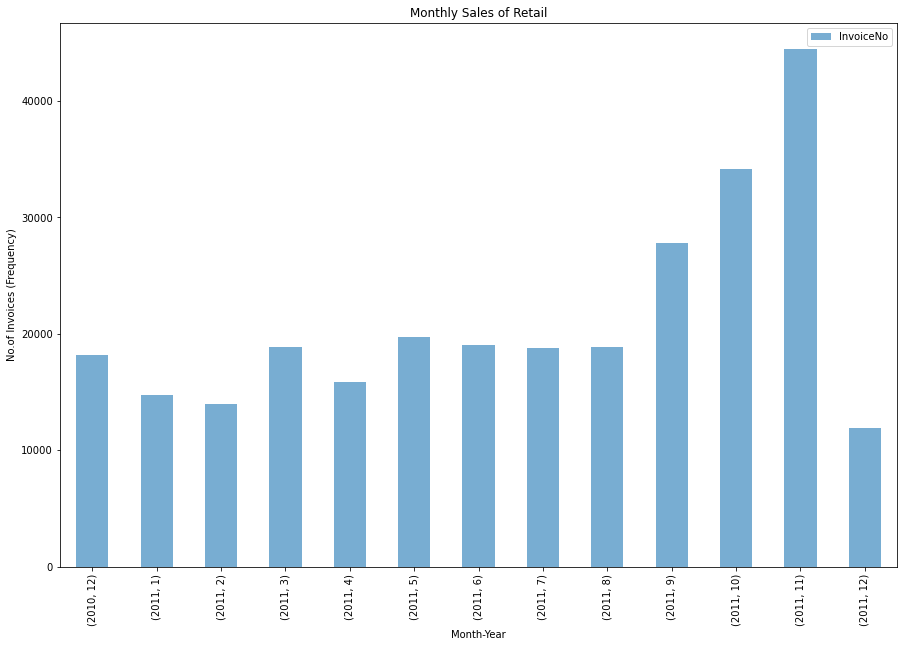

In [23]:
# Plot displaying the frequency of Monthwise Sales - InvoiceNo
import matplotlib.pyplot as plt
train_df_final.groupby(['year','month']).count()['InvoiceNo'].plot.bar(alpha=0.6,figsize=(15,10))
plt.xticks(rotation=90)
#plt.tight_layout()
plt.xlabel('Month-Year')
plt.ylabel('No.of Invoices (Frequency)')
plt.title('Monthly Sales of Retail')
plt.legend()
plt.show()

### This chart shows that frequency of sales is maximum in Nov,2011 

## Visualizing the Monetary of each Month

In [24]:
train_df_final.groupby(['year','month']).sum()['Total_Price']

year  month
2010  12       392196.990
2011  1        431827.590
      2        318920.370
      3        415144.870
      4        323606.571
      5        464376.840
      6        469348.560
      7        425699.191
      8        451813.920
      9        655356.780
      10       728304.420
      11       803275.350
      12       407510.130
Name: Total_Price, dtype: float64

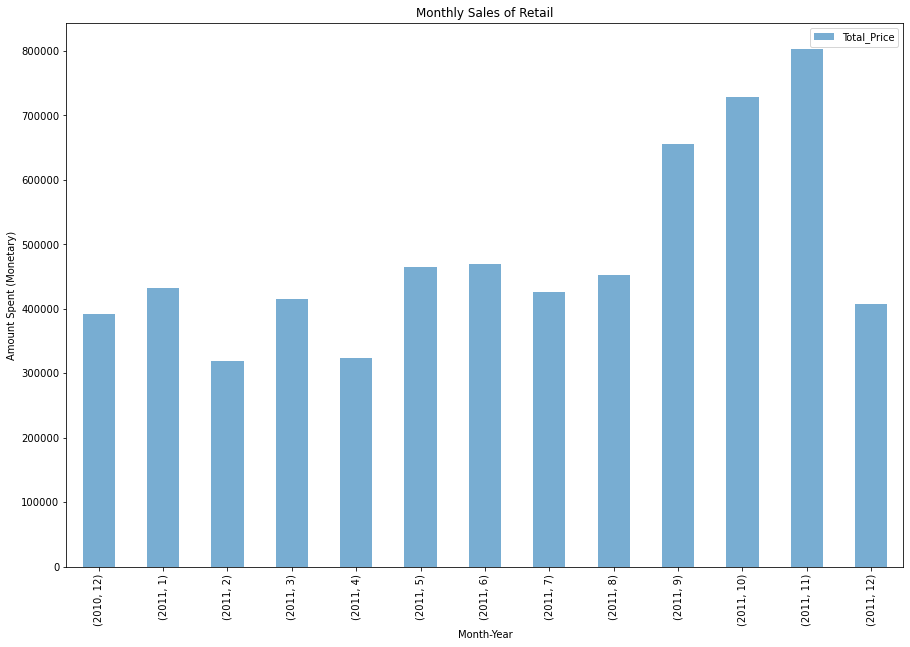

In [25]:
# Plot displaying the monetary monthwise  - total amount spent
import matplotlib.pyplot as plt
train_df_final.groupby(['year','month']).sum()['Total_Price'].plot.bar(alpha=0.6,figsize=(15,10))
plt.xticks(rotation=90)
#plt.tight_layout()
plt.xlabel('Month-Year')
plt.ylabel('Amount Spent (Monetary)')
plt.title('Monthly Sales of Retail')
plt.legend()
plt.show()

### This chart shows that max amount was spent by customers in Nov,2011 

## Monthly cohort Analysis :
## Active Customers each month

In [26]:
i=1
fr=[]
amt=[]
print("Monthly cohort Analysis \nActive Customers for each cohort")
print("*******************************")
for name,group in month_cohorts: # name-gives name of cohort, group- gives details of the cohort
    print("Cohort"+ str(i)+": "+name)
    details=group[['CustomerID','InvoiceNo','Total_Price']]
    
    #Calculate highest frequency InvoiceNo
    freq=details['InvoiceNo'].value_counts().index.tolist()[0]
    fr.append(freq)
    
    #Determine Customer with highest frequency InvoiceNo
    cust=group.loc[group['InvoiceNo']==freq]['CustomerID'].unique()[0]
    
    #Calculate the amount spent by the customer
    money=group.loc[group['CustomerID']==cust]['Total_Price'].sum()
    amt.append(money) 
    
    print("Highest frequency Invoice No:",freq,"\t","Highest frequency Customer ID",cust,"\t","Total amount paid by",cust,"is",money)
    print("Thus the ACTIVE CUSTOMER of COHORT"+ str(i)+": "+name+" is ",cust) 
    
    print()
    
    i=i+1


Monthly cohort Analysis 
Active Customers for each cohort
*******************************
Cohort1: 1-2011
Highest frequency Invoice No: 540372 	 Highest frequency Customer ID 13081.0 	 Total amount paid by 13081.0 is 2476.9800000000005
Thus the ACTIVE CUSTOMER of COHORT1: 1-2011 is  13081.0

Cohort2: 10-2011
Highest frequency Invoice No: 573576 	 Highest frequency Customer ID 14096.0 	 Total amount paid by 14096.0 is 12072.9
Thus the ACTIVE CUSTOMER of COHORT2: 10-2011 is  14096.0

Cohort3: 11-2011
Highest frequency Invoice No: 576339 	 Highest frequency Customer ID 14096.0 	 Total amount paid by 14096.0 is 19385.78
Thus the ACTIVE CUSTOMER of COHORT3: 11-2011 is  14096.0

Cohort4: 12-2010
Highest frequency Invoice No: 537224 	 Highest frequency Customer ID 13174.0 	 Total amount paid by 13174.0 is 984.22
Thus the ACTIVE CUSTOMER of COHORT4: 12-2010 is  13174.0

Cohort5: 12-2011
Highest frequency Invoice No: 580727 	 Highest frequency Customer ID 14096.0 	 Total amount paid by 14096.0 

### Thus Monthly analysis is done and active customer of each cohort is determined.
#### [Note: Cohort name is represented as month-year (eg:1-2011 means jan-2011)]

## Overall Monthly Analysis : 
## High frequency and Highly spent customer

In [27]:
print("Overall Analysis from Dec 2010 to Dec 2011")
print("InvoiceNo with highest frequency:",max(fr))
print("Highest Amount spent :",max(amt))

Overall Analysis from Dec 2010 to Dec 2011
InvoiceNo with highest frequency: 580727
Highest Amount spent : 19385.78


#### Invoice No.580727 has Max frequency of purchase which was done in Dec,2011 by customer ID: 14096.0 

#### Max amount spend was 19385.78 in Nov 2011 by customer ID: 14096.0 

### Thus we can conclude that customer ID: 14096.0 is the active customer

# Calculate Retention Rate

In [28]:
# No of customers in Dec 2010
chrt=month_cohorts.get_group('12-2010')
m=chrt['CustomerID'].nunique()
m

872

In [29]:
# No of customers in Dec 2011
chrt=month_cohorts.get_group('12-2011')
n=chrt['CustomerID'].nunique()
n

607

In [30]:
retention_rate=(n/m)*100
retention_rate

69.61009174311926

### Thus Retention rate is 69.61%  (ie, nearly 70%)

In [31]:
# Assuming current(recent) date as the last transaction date
recent_date=train_df_final['InvoiceDate'].max()
recent_date

Timestamp('2011-12-09 12:50:00')

# RFM Analysis

In [32]:
#unique customers
train_df_final['CustomerID'].value_counts()

17841.0    5413
14911.0    3978
14096.0    3607
12748.0    3105
14606.0    1856
           ... 
12814.0       1
14424.0       1
16765.0       1
15603.0       1
17956.0       1
Name: CustomerID, Length: 4321, dtype: int64

In [33]:
# Transactions of each customer 
first_transaction_dates= train_df_final.groupby(['CustomerID'])['InvoiceDate'].min()
last_transaction_dates = train_df_final.groupby(['CustomerID'])['InvoiceDate'].max()


In [34]:
train_df_final['first Invoice Date'] = train_df_final.apply(lambda row: first_transaction_dates.loc[row['CustomerID']], axis=1)
train_df_final['last Invoice Date'] = train_df_final.apply(lambda row: last_transaction_dates.loc[row['CustomerID']], axis=1)

In [35]:
# Total Price 
train_df_final['Total_Price']=train_df_final['Quantity']*train_df_final['UnitPrice']
train_df_final

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,first Invoice Date,last Invoice Date,Total_Price,month,year,month_yr
0,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom,2011-02-16 11:18:00,2011-11-10 16:03:00,30.00,6,2011,6-2011
1,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom,2010-12-05 12:13:00,2011-11-29 11:32:00,5.10,5,2011,5-2011
2,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom,2010-12-08 12:24:00,2011-11-17 11:29:00,0.85,1,2011,1-2011
3,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom,2010-12-10 17:26:00,2011-11-30 13:50:00,19.50,12,2010,12-2010
4,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom,2011-02-04 14:46:00,2011-10-13 15:43:00,15.00,5,2011,5-2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285070,566976,23051,RECYCLED ACAPULCO MAT BLUE,2,2011-09-16 09:27:00,8.25,15382.0,United Kingdom,2011-02-17 12:01:00,2011-11-25 10:58:00,16.50,9,2011,9-2011
285071,553872,21937,STRAWBERRY PICNIC BAG,5,2011-05-19 14:35:00,2.95,13050.0,United Kingdom,2010-12-08 09:30:00,2011-11-25 09:18:00,14.75,5,2011,5-2011
285073,572302,22091,EMPIRE TISSUE BOX,1,2011-10-23 14:47:00,0.39,15427.0,United Kingdom,2011-10-23 14:47:00,2011-11-06 14:29:00,0.39,10,2011,10-2011
285074,559339,84946,ANTIQUE SILVER T-LIGHT GLASS,60,2011-07-07 16:49:00,1.25,13752.0,United Kingdom,2011-04-07 12:04:00,2011-08-07 14:16:00,75.00,7,2011,7-2011


# Building RFM model

In [36]:
# Assuming current(recent) date as the last transaction date
recent_date=train_df_final['InvoiceDate'].max()

In [37]:
# Grouping by CustomerID
RFM_model_df = train_df_final.groupby(['CustomerID']).agg({'InvoiceDate':lambda x: (recent_date - x.max()).days,
       'InvoiceNo': 'nunique',
       'Total_Price': 'sum'})

In [38]:
# Renaming the columns of RFM table
RFM_model_df=RFM_model_df.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total_Price':'Monetary'})
RFM_model_df.columns

Index(['Recency', 'Frequency', 'Monetary'], dtype='object')

# Validating RFM model

In [39]:
RFM_table=RFM_model_df.copy() # creating a copy of original RFM table for analysis later 
RFM_table

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,3124.96
12348.0,74,4,1009.88
12349.0,18,1,1344.17
12350.0,309,1,213.30
...,...,...,...
18280.0,277,1,91.70
18281.0,180,1,59.28
18282.0,7,2,119.61


In [40]:
RFM_model_df.head()

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,1,7,3124.96
12348.0,74,4,1009.88
12349.0,18,1,1344.17
12350.0,309,1,213.30


We can see that for CustomerID :12346.0, 

Recency= 325 days,    Frequency=1,   Monetary=77183.60

where,
Recency: Time since last purchase (Inactive Days)
Frequency: Total no. of purchase(invoices)
Monetary: Total amt the customer spend

### Manual verification the above RFM table 
----------------------------------------------

Taking a sample value, CustomerID=12346.0

#### Frequency & Monetory verification:

In [41]:
train_df_final.loc[train_df_final['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,first Invoice Date,last Invoice Date,Total_Price,month,year,month_yr
242577,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-18 10:01:00,2011-01-18 10:01:00,77183.6,1,2011,1-2011


##### From the above output, we can see that 

##### Frequency is 1(as there is only 1 row output) and the Monetary(total_price) is 77183.6

#### Recency verification:

In [42]:
# Lets set this date as recent date for further analysis
recent_date = train_df_final['InvoiceDate'].max()
# Last invoice date for CustomerID :12346.0
x=last=[train_df_final.loc[train_df_final['CustomerID']==12346.0]][-1]['last Invoice Date']

# Days Inactive= today date-last invoice date
days=recent_date-x
days

242577   325 days 02:49:00
Name: last Invoice Date, dtype: timedelta64[ns]

##### From this calculation we can see that Recency(days inactive from last transaction) is 325 days

##### Hence we can conclude that our RFM model is correct


# Determining RFM Quartiles

In [43]:
quantiles = RFM_model_df.quantile(q=[0.25,0.5,0.75])
quantiles

,Recency,Frequency,Monetary
0.25,17.0,1.0,209.97
0.50,50.0,2.0,479.09
0.75,143.0,5.0,1180.08


In [44]:
# Convert quartile information into a dictionary so that cutoffs can be picked up.
quantiles=quantiles.to_dict()
quantiles

{'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 143.0},
 'Frequency': {0.25: 1.0, 0.5: 2.0, 0.75: 5.0},
 'Monetary': {0.25: 209.97, 0.5: 479.09000000000003, 0.75: 1180.08}}

# RFM Segmentation Table

We create two classes for the RFM segmentation. One for Recency and other for Frequency & Monetory
High recency is bad, while high frequency and monetary value is good

In [45]:
# Arguments (x = value, p = recency, monetary_value, frequency, d = quantiles dict)
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
# Arguments (x = value, p = recency, monetary_value, frequency, d = quantiles dict)
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4

In [46]:
RFM_Segmentation = RFM_model_df.copy()

RFM_Segmentation['R_Quartile'] = RFM_Segmentation['Recency'].apply(RScore, args=('Recency',quantiles))
RFM_Segmentation['F_Quartile'] = RFM_Segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles))
RFM_Segmentation['M_Quartile'] = RFM_Segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles))


In [47]:
RFM_Segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,1,1,4
12347.0,1,7,3124.96,4,4,4
12348.0,74,4,1009.88,2,3,3
12349.0,18,1,1344.17,3,1,4
12350.0,309,1,213.30,1,1,2


In [48]:
RFM_Segmentation['R_Quartile'] = RFM_Segmentation['Recency'].apply(RScore, args=('Recency',quantiles,))
RFM_Segmentation['F_Quartile'] = RFM_Segmentation['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
RFM_Segmentation['M_Quartile'] = RFM_Segmentation['Monetary'].apply(FMScore, args=('Monetary',quantiles,))

In [49]:
RFM_Segmentation['RFMScore'] = RFM_Segmentation.R_Quartile.map(str) \
                            + RFM_Segmentation.F_Quartile.map(str) \
                            + RFM_Segmentation.M_Quartile.map(str)

In [50]:
RFM_Segmentation.head()

,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,1,1,4,114
12347.0,1,7,3124.96,4,4,4,444
12348.0,74,4,1009.88,2,3,3,233
12349.0,18,1,1344.17,3,1,4,314
12350.0,309,1,213.30,1,1,2,112


The  RFM Score 444 is the Best score. 

### Best Recency score = 4 (most recently purchase)
### Best Frequency score = 4 (most frequently purchase)
### Best Monetary score = 4 (who spent the most)

# RFM Segment allocation


In [51]:
# Reset the index to create a customer_ID column
RFM_Segmentation.reset_index(inplace=True)

In [52]:
# Create a dictionary for each segment to map them against each customer
segment_dict = {
    'Best Customers':'444',      # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344',     # High frequency as well as monetary value with good recency
    'Big Spenders':'334',        # High monetary value but good recency and frequency values
    'Almost Lost':'244',         # Customer's shopping less often now who used to shop a lot
    'Lost Customers':'144',      # Customer's shopped long ago who used to shop a lot.
    'Recent Customers':'443',    # Customer's who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers':'122' # Customer's shopped long ago but with less frequency and monetary value
}

In [53]:
# Swap the key and value of dictionary
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))

In [54]:
# Allocate segments to each customer as per the RFM score mapping
RFM_Segmentation['Segment'] = RFM_Segmentation.RFMScore.map(lambda x: dict_segment.get(x))


In [55]:
# Allocate all remaining customers to others segment category
RFM_Segmentation.Segment.fillna('others', inplace=True)

In [56]:
RFM_Segmentation.sample(25)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment
2651,15978.0,76,1,855.34,2,1,3,213,others
690,13267.0,2,19,3423.73,4,4,4,444,Best Customers
1682,14647.0,200,1,209.09,1,1,1,111,others
4154,18062.0,172,3,504.67,1,3,3,133,others
3711,17446.0,176,2,94.50,1,2,1,121,others
3906,17708.0,187,2,204.88,1,2,1,121,others
2954,16392.0,269,1,136.12,1,1,1,111,others
3723,17460.0,93,6,485.00,2,4,3,243,others
1258,14059.0,266,1,120.60,1,1,1,111,others
3455,17080.0,21,1,105.00,3,1,1,311,others


# Data Modeling
-------------------------

### K-Means Clustering

We will use K-Means algorithm to cluster our customers. For this let us visualize the data distribution in RFM table

In [57]:
from sklearn.cluster import KMeans
import seaborn as sns 

In [58]:
RFM_table.describe()

,Recency,Frequency,Monetary
count,4321.000000,4321.000000,4321.000000
mean,91.995371,4.166165,1455.075580
std,100.371089,7.405683,6426.698726
min,0.000000,1.000000,0.000000
25%,17.000000,1.000000,209.970000
50%,50.000000,2.000000,479.090000
75%,143.000000,5.000000,1180.080000
max,373.000000,197.000000,190759.920000


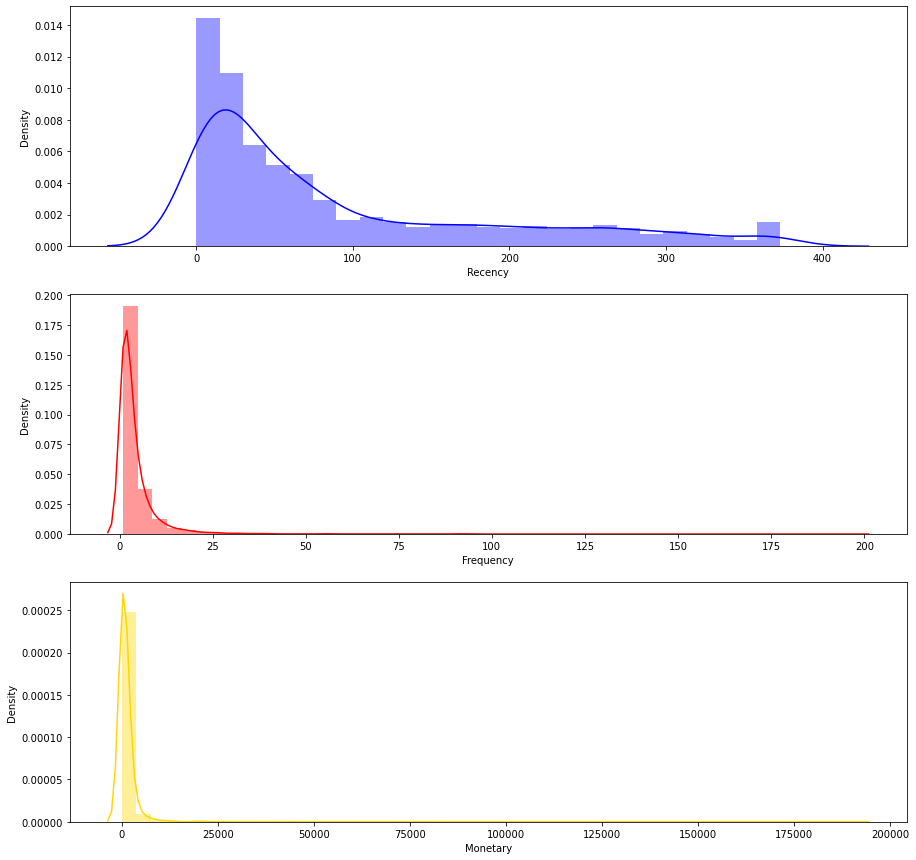

In [59]:
# plot
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(RFM_model_df.Recency , color="blue", ax=axes[0], axlabel='Recency')
sns.distplot(RFM_model_df.Frequency , color="red", ax=axes[1], axlabel='Frequency')
sns.distplot(RFM_model_df.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
# plt.xlim(50,75);
plt.show();

Here we can observe that the data is highly skewed. So we have to transform and scale the data first because K-Means assumes that the variables should have a symmetric distributions(not skewed) and they should have same average values as well as same variance.

In [60]:
# Let's describe the table to see if there are any negative values
RFM_model_df.describe()

,Recency,Frequency,Monetary
count,4321.000000,4321.000000,4321.000000
mean,91.995371,4.166165,1455.075580
std,100.371089,7.405683,6426.698726
min,0.000000,1.000000,0.000000
25%,17.000000,1.000000,209.970000
50%,50.000000,2.000000,479.090000
75%,143.000000,5.000000,1180.080000
max,373.000000,197.000000,190759.920000


In [61]:
# Create a copy of rfm table
rfm_table_scaled = RFM_model_df.copy()

# Shift all values in the column by adding absolute of minimum value to each value, thereby making each value positive.
rfm_table_scaled.Monetary = rfm_table_scaled.Monetary + abs(rfm_table_scaled.Monetary.min()) + 1
rfm_table_scaled.Recency = rfm_table_scaled.Recency + abs(rfm_table_scaled.Recency.min()) + 1

# Check the summary of new values
rfm_table_scaled.describe()

,Recency,Frequency,Monetary
count,4321.000000,4321.000000,4321.000000
mean,92.995371,4.166165,1456.075580
std,100.371089,7.405683,6426.698726
min,1.000000,1.000000,1.000000
25%,18.000000,1.000000,210.970000
50%,51.000000,2.000000,480.090000
75%,144.000000,5.000000,1181.080000
max,374.000000,197.000000,190760.920000


In [62]:
# Transform the data before K-Means clustering
from sklearn.preprocessing import StandardScaler

# Taking log first because normalization forces data for negative values
log_df = np.log(rfm_table_scaled)

# Normalize the data for uniform averages and means in the distribution.
scaler = StandardScaler()
normal_df = scaler.fit_transform(log_df)
normal_df = pd.DataFrame(data=normal_df, index=RFM_table.index, columns=RFM_table.columns)

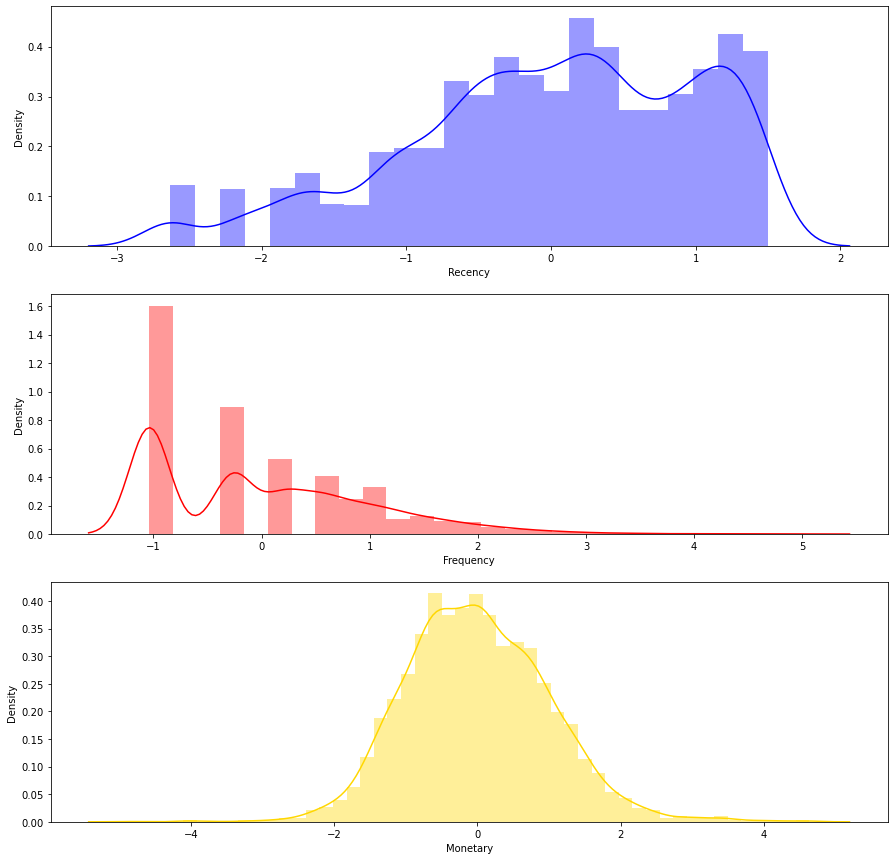

In [63]:
# plot again on the transformed RFM data
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
sns.distplot(normal_df.Recency , color="blue", ax=axes[0], axlabel='Recency')
sns.distplot(normal_df.Frequency , color="red", ax=axes[1], axlabel='Frequency')
sns.distplot(normal_df.Monetary , color="gold", ax=axes[2], axlabel='Monetary')
plt.show();

We can observe that the means & averages are approximately uniformed now in each distribution. Now the data is apt for unsupervised algorithm i.e. K-Means. We will first use elbow method to try to find number of appropriate clusters to divide customers as per the spending pattern.

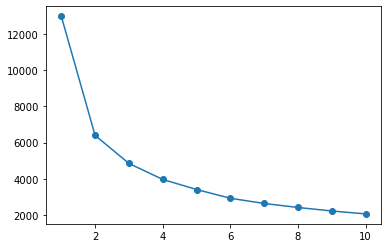

In [64]:
# find WCSS
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(normal_df)
    wcss.append(kmeans.inertia_)

# plot elbow graph
plt.plot(range(1,11),wcss,marker='o');

From the elbow graph, it seems that good number of cluster would be either 2 or 3 as after that, its a smooth curve i.e. no change of orientation. but to overcome that confusion, we will use silhouette score method to find the optimum number of clusters because it is often much better in figuring out the number of valid clusters than the elbow method

Silhouette score for number of cluster(s) 2: 0.431162046735205
Silhouette score for number of cluster(s) 3: 0.33948933594881997
Silhouette score for number of cluster(s) 4: 0.3383355925928172
Silhouette score for number of cluster(s) 5: 0.2960236313953996
Silhouette score for number of cluster(s) 6: 0.30743456677873193
Silhouette score for number of cluster(s) 7: 0.3047046510708027


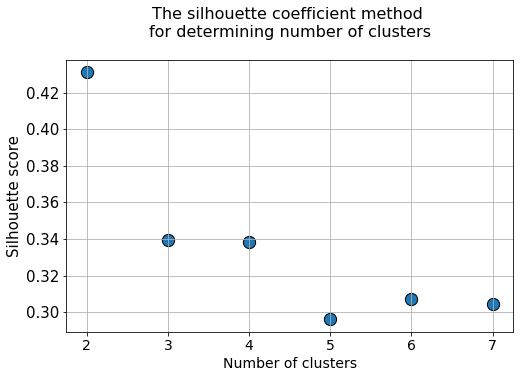

In [65]:
from sklearn.metrics import silhouette_score
wcss_silhouette = []
for i in range(2,8):
    km = KMeans(n_clusters=i, random_state=0,init='k-means++').fit(normal_df)
    preds = km.predict(normal_df)    
    silhouette = silhouette_score(normal_df,preds)
    wcss_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))

plt.figure(figsize=(8,5))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,8)],y=wcss_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,8)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

From here we can take take optimum number of cluster as 4 and not 2 or 3 because that is the only point after which the mean cluster distance falls steeply and then looks to be plateaued. 

Now let's apply K-Means on 4 clusters to segregate the customer base.

In [66]:
kmeans = KMeans(n_clusters=4, random_state=1, init='k-means++')
kmeans.fit(normal_df)
cluster_labels = kmeans.labels_

In [67]:
kmeans

KMeans(n_clusters=4, random_state=1)

In [68]:
print(f"Shape of cluster label array is {cluster_labels.shape}")
print(f"Shape of RFM segment dataframe is {RFM_Segmentation.shape}")

Shape of cluster label array is (4321,)
Shape of RFM segment dataframe is (4321, 9)


In [69]:
# Assign the clusters as column to each customer
Cluster_table = RFM_Segmentation.assign(Cluster = cluster_labels)

In [70]:
# Check counts of records assigned to different clusters
Cluster_table.Cluster.value_counts()

1    1645
3    1230
0     739
2     707
Name: Cluster, dtype: int64

### Here we can see that more customers are there in cluster 3 and cluster 1

# Let us study the clusters more carefully

In [71]:
Cluster_table.sample(20)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
903,13565.0,18,2,205.19,3,2,1,321,others,0
1414,14280.0,196,1,75.45,1,1,1,111,others,1
3516,17171.0,288,1,166.61,1,1,1,111,others,1
3531,17191.0,27,7,1459.63,3,4,4,344,Loyal Customers,3
3522,17179.0,177,3,472.61,1,3,2,132,others,3
3137,16648.0,42,1,213.36,3,1,2,312,others,1
3337,16915.0,8,6,318.54,4,4,2,442,others,0
422,12886.0,67,2,972.22,2,2,3,223,others,3
1697,14666.0,23,1,145.80,3,1,1,311,others,0
924,13593.0,107,5,1411.57,2,3,4,234,others,3


#### Observing the RFM score we can see that, 
#### Cluster 2 customers have high RFM score.Their recency,frequency and monetary are high.
#### Clustor 0  are recent customers but their frequency of purchase and monetary value is low.
#### Clustor 1 are customers who visited long ago and are non-frequent buyers with low monetory
### Cluster 3 has low recency though their frequency and monetory is good.

## Closer look at Customers in each cluster

In [72]:
#Cluster 2
Cluster_table[Cluster_table.Cluster == 2].sample(20)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
822,13458.0,6,14,6743.76,4,4,4,444,Best Customers,2
4077,17949.0,0,39,46080.28,4,4,4,444,Best Customers,2
2908,16333.0,7,19,20487.20,4,4,4,444,Best Customers,2
264,12670.0,9,5,1937.51,4,3,4,434,others,2
1429,14299.0,7,8,2536.03,4,4,4,444,Best Customers,2
1235,14032.0,1,11,2294.80,4,4,4,444,Best Customers,2
1528,14440.0,7,5,1620.73,4,3,4,434,others,2
101,12472.0,31,7,4537.74,3,4,4,344,Loyal Customers,2
3390,16987.0,2,7,1086.84,4,4,3,443,Recent Customers,2
2380,15602.0,7,9,1104.01,4,4,3,443,Recent Customers,2


### Cluster 2, has the best customers.There are many recent,frequently purchasing and high spending customers in it.

In [73]:
#Cluster 3
Cluster_table[Cluster_table.Cluster == 3].sample(20)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
1103,13849.0,51,2,1039.01,2,2,3,223,others,3
2822,16206.0,54,4,469.37,2,3,2,232,others,3
2570,15855.0,136,5,528.09,2,3,3,233,others,3
2834,16218.0,29,7,2354.38,3,4,4,344,Loyal Customers,3
2104,15227.0,36,5,847.85,3,3,3,333,others,3
3340,16918.0,49,6,761.68,3,4,3,343,others,3
2795,16172.0,94,5,792.09,2,3,3,233,others,3
2985,16431.0,212,3,449.56,1,3,2,132,others,3
2384,15606.0,60,9,2197.44,2,4,4,244,Almost Lost,3
584,13122.0,93,2,645.47,2,2,3,223,others,3


### In Cluster3, the customers are good buyers. They visit once in a while and spend decently.

In [74]:
#Cluster 
Cluster_table[Cluster_table.Cluster == 0].sample(20)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
491,12990.0,30,3,226.20,3,3,2,332,others,0
3645,17360.0,16,3,383.92,4,3,2,432,others,0
3735,17481.0,3,4,813.93,4,3,3,433,others,0
416,12879.0,44,3,168.34,3,3,1,331,others,0
1607,14539.0,15,2,433.68,4,2,2,422,others,0
351,12787.0,9,3,404.58,4,3,2,432,others,0
4183,18101.0,10,2,184.70,4,2,1,421,others,0
11,12358.0,1,2,436.88,4,2,2,422,others,0
3074,16557.0,23,2,147.75,3,2,1,321,others,0
3593,17286.0,21,1,123.18,3,1,1,311,others,0


### Cluster 0 are recent customers but do not purchase frequently nor spend much money. 

In [75]:
#Cluster 1
Cluster_table[Cluster_table.Cluster == 1].sample(20)

,CustomerID,Recency,Frequency,Monetary,R_Quartile,F_Quartile,M_Quartile,RFMScore,Segment,Cluster
1332,14162.0,173,2,238.96,1,2,2,122,Lost Cheap Customers,1
2259,15437.0,261,1,167.81,1,1,1,111,others,1
1660,14619.0,245,1,312.54,1,1,2,112,others,1
2001,15096.0,42,1,136.29,3,1,1,311,others,1
832,13473.0,60,2,197.52,2,2,1,221,others,1
2213,15374.0,128,1,117.00,2,1,1,211,others,1
1142,13897.0,49,1,222.32,3,1,2,312,others,1
918,13587.0,63,1,560.00,2,1,3,213,others,1
2529,15803.0,50,1,339.50,3,1,2,312,others,1
497,12999.0,204,2,357.48,1,2,2,122,Lost Cheap Customers,1


### Cluster 1: These customers customers who visited long ago and are non-frequent buyers with low monetory

## Visualising the clusters

### Scatter plots
These will help us visualize the division of customers into different segments based on the RFM atributes.

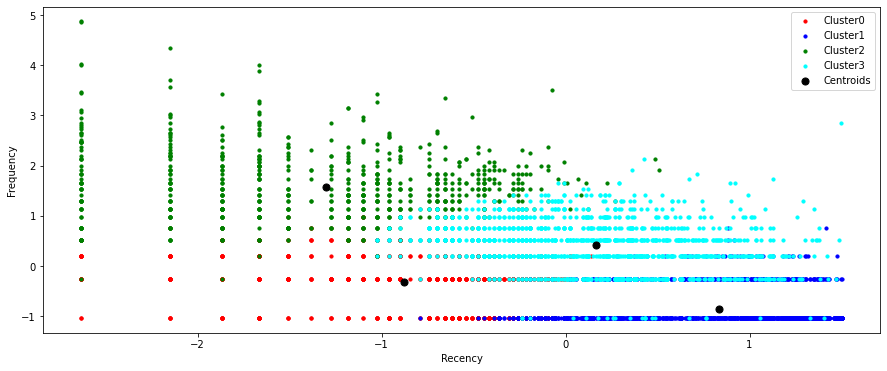

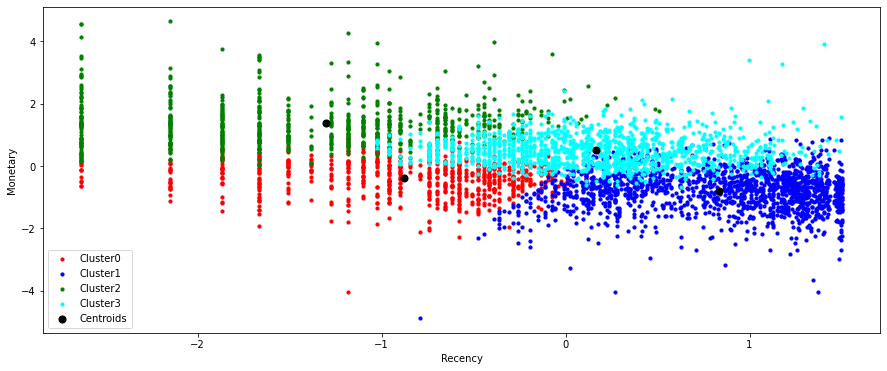

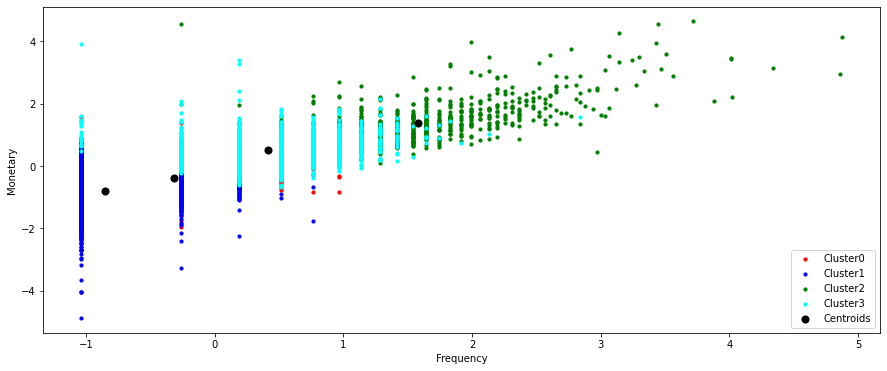

In [76]:
#Plotting two dimesional plots of each attributes respectively.
X = normal_df.iloc[:,0:3].values
count=X.shape[1]
for i in range(0,count):
    for j in range(i+1,count):
        plt.figure(figsize=(15,6));
        plt.scatter(X[cluster_labels == 0, i], X[cluster_labels == 0, j], s = 10, c = 'red', label = 'Cluster0')
        plt.scatter(X[cluster_labels == 1, i], X[cluster_labels == 1, j], s = 10, c = 'blue', label = 'Cluster1')
        plt.scatter(X[cluster_labels == 2, i], X[cluster_labels == 2, j], s = 10, c = 'green', label = 'Cluster2')
        plt.scatter(X[cluster_labels == 3, i], X[cluster_labels == 3, j], s = 10, c = 'cyan', label = 'Cluster3')
        plt.scatter(kmeans.cluster_centers_[:,i], kmeans.cluster_centers_[:,j], s = 50, c = 'black', label = 'Centroids')
        plt.xlabel(normal_df.columns[i])
        plt.ylabel(normal_df.columns[j])
        plt.legend()        
        plt.show();


We can clearly see the different customers segments with the help of scatter plots. 
Most evidently from the plot of Recency v/s frequency almost each segment is seprate without much overlap.

Thus we can conclude that Cluster 2 is the best group as they are high spenders and frequent purchasers and recent customers.
They are followed by Cluster 3 who are good customers who also are average in terms of frequency and monetary.
Cluster 0 and 1 have low monetary and are not frequent buyers.Cluster 1 are customers who have very low recency. 

### Data Reporting
-------------------------

### Dashboard for the Retail-Customer Analysis is uploaded in this link:
### https://public.tableau.com/app/profile/rejani.ninan/viz/CapstoneProject_Retail_RejaniNinan/Dashboard?publish=yes